## NSGA-II

The algorithm is implemented based on <cite data-cite="nsga2"></cite> [\[benchmark\]](https://www.egr.msu.edu/coinlab/blankjul/pymoo-benchmark/nsga2.html) [\[data\]](https://www.egr.msu.edu/coinlab/blankjul/pymoo-benchmark/nsga2.zip)
. A benchmark of the algorithm against the original C code can be found 
The algorithm follows the general
outline of a genetic algorithm with a modified mating and survival selection. In NSGA-II, first, individuals
are selected frontwise. By doing so, there will be the situation where a front needs to be split because not all individuals are allowed to survive. In this splitting front, solutions are selected based on crowding distance. 

<div style="display: block;margin-left: auto;margin-right: auto;width: 80%;">
![nsga2_survival](../resources/images/nsga2_survival.png)
</div>


The crowding distance is basically the Manhatten Distance in the objective space. However, the extreme points are desired to be kept every generation and, therefore, get assigned a crowding distance of infinity.

<div style="display: block;margin-left: auto;margin-right: auto;width: 50%;">
![nsga2_crowding](../resources/images/nsga2_crowding.png)
</div>

Furthermore, to increase some selection pressure NSGA-II uses a binary tournament mating selection. Each individual is first compared by rank and then crowding distance. There also exists a variant in the original C code where instead of using the rank the domination criterium between two solutions is used.

### Example

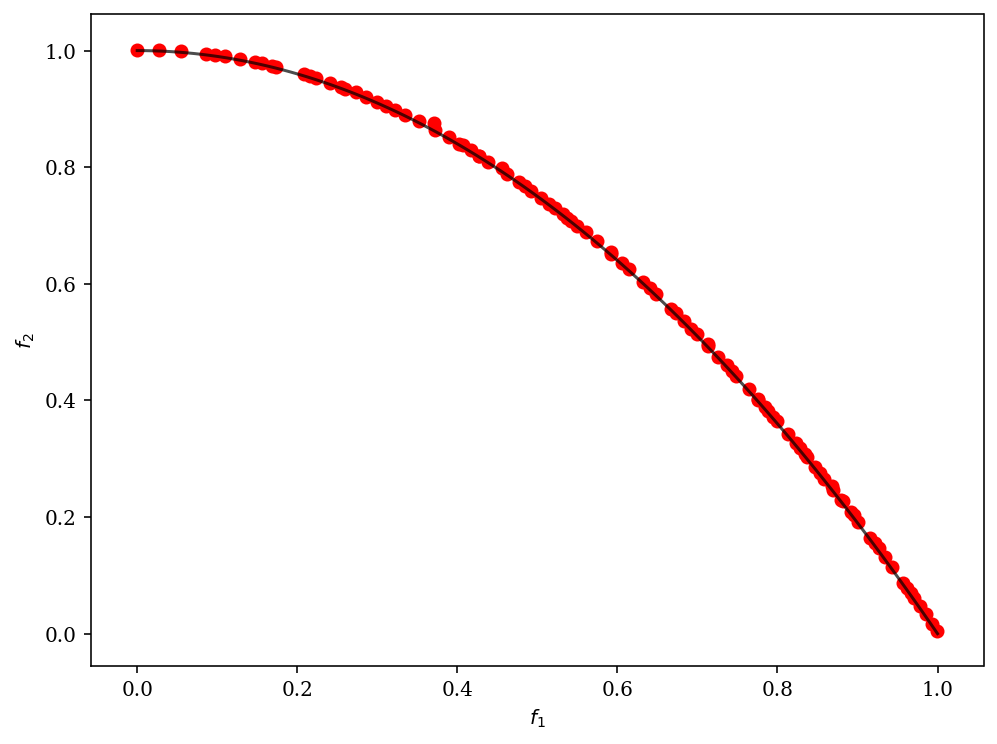

In [1]:
from pymoo.algorithms.nsga2 import NSGA2
from pymoo.factory import get_problem
from pymoo.optimize import minimize
from pymoo.visualization.scatter import Scatter

problem = get_problem("zdt2")

algorithm = NSGA2(pop_size=100, eliminate_duplicates=True)

res = minimize(problem,
               algorithm,
               ('n_gen', 200),
               seed=1,
               verbose=False)

plot = Scatter()
plot.add(problem.pareto_front(), plot_type="line", color="black", alpha=0.7)
plot.add(res.F, color="red")
plot.show()


Moreover, we can customize NSGA-II to solve a problem with binary decision variable, for example ZDT5.

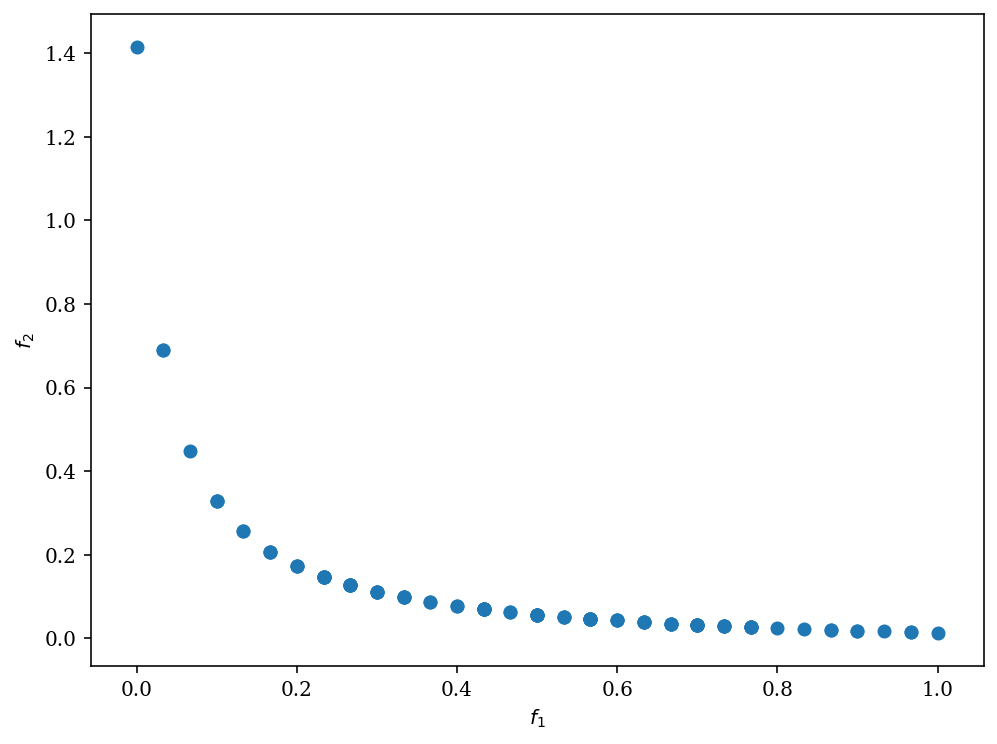

In [2]:
from pymoo.algorithms.nsga2 import NSGA2
from pymoo.factory import get_problem, get_sampling, get_crossover, get_mutation
from pymoo.optimize import minimize
from pymoo.visualization.scatter import Scatter

problem = get_problem("zdt5")

algorithm = NSGA2(pop_size=100,
                  sampling=get_sampling("bin_random"),
                  crossover=get_crossover("bin_two_point"),
                  mutation=get_mutation("bin_bitflip"),
                  eliminate_duplicates=True)

res = minimize(problem,
               algorithm,
               ('n_gen', 500),
               seed=1,
               verbose=False)


Scatter().add(res.F).show()



### API